# Connessione al DB

In [148]:
import os
import dotenv
import sqlalchemy
import pandas as pd
from IPython.display import Markdown

dotenv.load_dotenv(override=True)

AWDW_user = os.getenv("AWDW_user")
AWDW_pass = os.getenv("AWDW_pass")
AWDW_host = os.getenv("AWDW_host")
AWDW_dbname = os.getenv("AWDW_dbname")

connection_string = "mysql+pymysql://" + AWDW_user + ":" + AWDW_pass + "@" + AWDW_host + "/" + AWDW_dbname

db_engine = sqlalchemy.create_engine(connection_string)

# Esercizio 1
Estraiamo la tabella dimproduct dal database AdventureWorks, e valutiamo quanto segue: 
- Quanti dati ci sono in totale?
- Quali sono i metadati?
- Stampiamo il primo elemento
- Stampiamo l'ultimo elemento
- Riusciamo a stampare cinque elementi a caso?
- Quali sono i colori disponibili?

In [149]:
query = "SELECT * FROM dimproduct"

dimproduct = pd.read_sql(query, db_engine)
print("Dati totali:", dimproduct.shape)
print("Metadati :", dimproduct.columns.values)

Dati totali: (606, 36)
Metadati : ['ProductKey' 'ProductAlternateKey' 'ProductSubcategoryKey'
 'WeightUnitMeasureCode' 'SizeUnitMeasureCode' 'EnglishProductName'
 'SpanishProductName' 'FrenchProductName' 'StandardCost'
 'FinishedGoodsFlag' 'Color' 'SafetyStockLevel' 'ReorderPoint' 'ListPrice'
 'Size' 'SizeRange' 'Weight' 'DaysToManufacture' 'ProductLine'
 'DealerPrice' 'Class' 'Style' 'ModelName' 'LargePhoto'
 'EnglishDescription' 'FrenchDescription' 'ChineseDescription'
 'ArabicDescription' 'HebrewDescription' 'ThaiDescription'
 'GermanDescription' 'JapaneseDescription' 'TurkishDescription'
 'StartDate' 'EndDate' 'Status']


In [150]:
display(Markdown("## Prima riga:"))
display(dimproduct.head(1))

## Prima riga:

,ProductKey,ProductAlternateKey,ProductSubcategoryKey,WeightUnitMeasureCode,SizeUnitMeasureCode,EnglishProductName,SpanishProductName,FrenchProductName,StandardCost,FinishedGoodsFlag,...,ChineseDescription,ArabicDescription,HebrewDescription,ThaiDescription,GermanDescription,JapaneseDescription,TurkishDescription,StartDate,EndDate,Status
0,1,AR-5381,NaN,None,None,Adjustable Race,,,NaN,0,...,None,None,None,None,None,None,None,2003-07-01,NaT,Current


In [151]:
display(Markdown("## Ultima riga:"))
display(dimproduct.tail(1))

## Ultima riga:

,ProductKey,ProductAlternateKey,ProductSubcategoryKey,WeightUnitMeasureCode,SizeUnitMeasureCode,EnglishProductName,SpanishProductName,FrenchProductName,StandardCost,FinishedGoodsFlag,...,ChineseDescription,ArabicDescription,HebrewDescription,ThaiDescription,GermanDescription,JapaneseDescription,TurkishDescription,StartDate,EndDate,Status
605,606,BK-R19B-52,2.0,LB,CM,"Road-750 Black, 52","Carretera: 750, negra, 52","Vélo de route 750 noir, 52",343.65,1,...,入门级成人自行车；确保越野旅行或公路骑乘的舒适。快拆式车毂和轮缘。,إنها دراجة مناسبة للمبتدئين من البالغين؛ فهي ت...,"אופני מבוגרים למתחילים; מציעים רכיבה נוחה ""מחו...",จักรยานระดับเริ่มต้นสำหรับผู้ใหญ่ ให้ความสบายใ...,Ein Erwachsenenrad für Einsteiger; bietet Komf...,エントリー レベルに対応する、クロスカントリーにも街への買い物にも快適な、大人の自転車。ハブ...,"""Başlangıç seviyesinde yetişkin bisikleti, kır...",2013-07-01,NaT,Current


In [152]:
display(Markdown("## 5 righe casuali:"))
display(dimproduct.sample(5))

## 5 righe casuali:

,ProductKey,ProductAlternateKey,ProductSubcategoryKey,WeightUnitMeasureCode,SizeUnitMeasureCode,EnglishProductName,SpanishProductName,FrenchProductName,StandardCost,FinishedGoodsFlag,...,ChineseDescription,ArabicDescription,HebrewDescription,ThaiDescription,GermanDescription,JapaneseDescription,TurkishDescription,StartDate,EndDate,Status
177,178,RA-7490,NaN,None,None,Cone-Shaped Race,,,NaN,0,...,None,None,None,None,None,None,None,2003-07-01,NaT,Current
522,523,SE-T924,15.0,None,None,HL Touring Seat/Saddle,Sillín/asiento de paseo GA,Selle de vélo de randonnée HL,23.37,1,...,精致的车架，令您骑乘更舒适。,هيكل خارجي تم تصميمه لتوفير مزيد من الراحة أثن...,מעטפת קעורה לרכיבה נוחה יותר.,เปลือกพิเศษสำหรับการขับขี่ที่แสนสบาย,Ausgeschnittene Form für komfortableres Fahren.,より快適な乗り心地のためのカット アウト シェル。,Daha konforlu bir sürüş için özel sele kaplaması.,2013-07-01,NaT,Current
271,272,FR-R38R-62,14.0,LB,CM,"LL Road Frame - Red, 62","Cuadro de carretera GB: rojo, 62","Cadre de vélo de route LL - rouge, 62",181.49,1,...,LL 车架提供了安全舒适的骑乘，经济实惠的铝制车架提供了卓越的避震功能。,يوفر الهيكل LL Frame قيادة آمنة ومريحة، مع توف...,"מסגרת ה- LL מספקת רכיבה בטוחה ונוחה ועם זאת, מ...",เฟรม LL ให้ความปลอดภัยและสบายขณะขับขี่ พร้อมทั...,Mit dem LL-Rahmen fahren Sie sicher und komfor...,LL フレームは、安全で快適に乗ることができ、値打ち価格のアルミニウム フレームで優れた衝撃...,"""LL Kadro güvenli ve konforlu sürüş sunar, değ...",2011-07-01,2007-12-28,None
280,281,FR-R38B-44,14.0,LB,CM,"LL Road Frame - Black, 44","Cuadro de carretera GB: negro, 44","Cadre de vélo de route LL - noir, 44",204.63,1,...,LL 车架提供了安全舒适的骑乘，经济实惠的铝制车架提供了卓越的避震功能。,يوفر الهيكل LL Frame قيادة آمنة ومريحة، مع توف...,"מסגרת ה- LL מספקת רכיבה בטוחה ונוחה ועם זאת, מ...",เฟรม LL ให้ความปลอดภัยและสบายขณะขับขี่ พร้อมทั...,Mit dem LL-Rahmen fahren Sie sicher und komfor...,LL フレームは、安全で快適に乗ることができ、値打ち価格のアルミニウム フレームで優れた衝撃...,"""LL Kadro güvenli ve konforlu sürüş sunar, değ...",2013-07-01,NaT,Current
565,566,BK-T18U-58,3.0,LB,CM,"Touring-3000 Blue, 58","Paseo: 3000, azul, 58","Vélo de randonnée 3000 bleu, 58",461.44,1,...,全能经济型自行车，具备基本的舒适和安全特征。提供了更宽也更稳固的轮胎，适用于环城游或周末旅行。,إنها دراجة قيّمة تصلح لكافة المناسبات وهي تشتم...,אופני איכות לכל מטרה עם תכונות הנוחות והבטיחות...,จักรยานอเนกประสงค์สุดคุ้ม พร้อมความสบายและความ...,"""Ein günstiges Allzweckfahrrad mit Basiskomfor...",ベーシックな快適性と安全性を備えた、多目的で手軽な自転車。街中での走行および週末の小旅行用に...,Temel konfor ve güvenlik özellikleriyle her ye...,2013-07-01,NaT,Current


In [153]:
print("Colori totali:", dimproduct['Color'].nunique(), dimproduct['Color'].unique())

Colori totali: 10 ['NA' 'Black' 'Silver' 'Red' 'White' 'Blue' 'Multi' 'Yellow' 'Grey'
 'Silver/Black']


# Esercizio 2
- In media quanto pesano i prodotti (per questo esercizio, ignoriamo l'unità di misura, ma usiamo solo i valori della colonna relativa)?
- Quanto pesa il più leggero?
- Quanto pesa il più pesante?
- Quanti prodotti pesano più di 100?
- Quanto costano in media i prodotti (colonna DealerPrice)?
- Quali sono i quartili dei prezzi?

In [190]:
weight = dimproduct['Weight']
dealerprice = dimproduct['DealerPrice']

print("Peso medio dei prodotti:", weight.mean())
print("Peso minimo:", weight.min())
print("Peso massimo:", weight.max())
print("Num. prodotti che pesano più di 100:", weight[weight > 100].shape[0])

print("Costo medio prodotti:", dealerprice.mean())
print("Quartile dei prezzi:", dealerprice.quantile(q=0.25))

Peso medio dei prodotti: 56.1932269503546
Peso minimo: 2.12
Peso massimo: 1050.0
Num. prodotti che pesano più di 100: 28
Costo medio prodotti: 448.5970597468353
Quartile dei prezzi: 41.994


# Esercizio 3
- Qual è il prezzo medio per i prodotti di colore blu?
- Qual è il prezzo medio per i prodotti di colore rosso o nero?
- Qual è il prezzo massimo per i prodotti di taglia 42 e peso oltre i 10 Kg?
- Qual è il nome inglese e il costo di produzione (StandardCost) di tutti i prodotti di taglia 42, peso oltre i 10 Kg e colore argento?
- Visualizziamo lo StandardCost e il DealerPrice degli ultimi 20 elementi del dataset: quali sono le differenze? C'è un pattern? C'è qualche elemento che non lo segue?

In [155]:
filtro_blu = dimproduct['Color'] == "Blue"
filtro_rosso = dimproduct['Color'] == "Red"
filtro_nero = dimproduct['Color'] == "Black"

print("Prezzo medio prodotti di colore blu:", dealerprice[filtro_blu].mean())
print("Prezzo medio prodotti di colore rosso o nero:", dealerprice[filtro_rosso | filtro_nero].mean())

Prezzo medio prodotti di colore blu: 516.0631785714286
Prezzo medio prodotti di colore rosso o nero: 550.2481873684211


In [156]:
filtro_taglia = dimproduct['Size'] == 42
filtro_peso = dimproduct['Weight'] > 10

print("Prezzo max dei prodotti taglia 42 e peso > 10 Kg:", dealerprice[filtro_taglia | filtro_peso].max())

Prezzo max dei prodotti taglia 42 e peso > 10 Kg: 2146.962


In [157]:
filtro_argento = dimproduct['Color'] == "Silver"

table = dimproduct[filtro_taglia | filtro_peso | filtro_argento][['EnglishProductName','StandardCost']]
display(table[ table['StandardCost'].notnull() ])

,EnglishProductName,StandardCost
287,"HL Mountain Frame - Silver, 42",623.84
288,"HL Mountain Frame - Silver, 42",660.91
289,"HL Mountain Frame - Silver, 42",747.20
290,"HL Mountain Frame - Silver, 44",706.81
291,"HL Mountain Frame - Silver, 48",706.81
...,...,...
601,ML Bottom Bracket,44.95
602,HL Bottom Bracket,53.94
603,"Road-750 Black, 44",343.65
604,"Road-750 Black, 48",343.65


In [158]:
display(dimproduct[['StandardCost', 'DealerPrice']].tail(20))
print("Differenza\n", dimproduct['DealerPrice'].tail(20) - dimproduct['StandardCost'].tail(20), sep="")

,StandardCost,DealerPrice
586,419.78,461.694
587,419.78,461.694
588,419.78,461.694
589,419.78,461.694
590,308.22,338.994
591,308.22,338.994
592,308.22,338.994
593,308.22,338.994
594,308.22,338.994
595,294.58,323.994


Differenza
586    41.914
587    41.914
588    41.914
589    41.914
590    30.774
591    30.774
592    30.774
593    30.774
594    30.774
595    29.414
596    29.414
597    29.414
598    29.414
599    29.414
600     8.424
601    15.794
602    18.954
603   -19.656
604   -19.656
605   -19.656
dtype: float64


# Esercizio 4
Tra i beginner datasets scaricabili all'indirizzo https://www.kaggle.com/datasets/ahmettezcantekin/beginner-datasets selezioniamo amazon.csv, un dataset contenente una serie di recensioni su Amazon. 
- Valutiamo la dimensione del dataset
- Visualizziamo dieci righe a caso;
- Osserviamo quali sono i nomi di colonna;
- Il dataset è bilanciato, ovvero, il numero di recensioni positive è uguale a quello delle negative, oppure no?

In [159]:
amazon_df = pd.read_csv('amazon.csv')

print("Dimensione del dataset:", amazon_df.shape)
print("\nDieci righe a caso:", amazon_df.sample(10), sep="\n")

print("\nNomi delle colonne:", amazon_df.columns.values, sep="\n")

positive = amazon_df['Positive']

print("\nRecensioni negative:",positive[ positive == 0 ].count())
print("Recensioni positive:",positive[ positive == 1 ].count())

Dimensione del dataset: (20000, 2)

Dieci righe a caso:
                                              reviewText  Positive
2948   Here we go, another game with In App Purchases...         0
19600  I downloaded this app thinking it would be rea...         0
17921  ........love it........fun.......the bear is a...         1
6325   probably the worst most pointless game ever pl...         0
9853   This gives me a countdown reminder on my home ...         1
13055  You are in a univere surrounded by stars.  The...         1
3065   This is a really interesting program to have. ...         1
4063   Task killers are not needed and can cause more...         0
4252   This company lied. They said that it has a unl...         0
13865  A great way to keep up on what is really happe...         1

Nomi delle colonne:
['reviewText' 'Positive']

Recensioni negative: 4767
Recensioni positive: 15233


# Esercizio 5
Il dataset diabetes.csv raccoglie persone con diabete o meno, e il valore di diverse variabili fisiologiche dei pazienti. 
- Osserviamone le dimensioni e un'anteprima di cinque righe;
- Prendiamoci un po' di tempo per dare un'occhiata ai metadati delle colonne;
- Stampiamo dei descrittori statistici del dataset;
- Selezioniamo i dati relativi a diverse fasce di età: 20-29, 30-39, 40-50;
- Qual è la media della pressione sanguigna diastolica per le diverse fasce di età?

In [160]:
diabetes_df = pd.read_csv('diabetes.csv')

print("Dimensione del dataset:", diabetes_df.shape)
display(Markdown("### 5 righe a caso:"))
display(diabetes_df.sample(5))

Dimensione del dataset: (768, 9)


### 5 righe a caso:

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
377,1,87,60,37,75,37.2,0.509,22,0
702,1,168,88,29,0,35.0,0.905,52,1
125,1,88,30,42,99,55.0,0.496,26,1
191,9,123,70,44,94,33.1,0.374,40,0
512,9,91,68,0,0,24.2,0.200,58,0


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


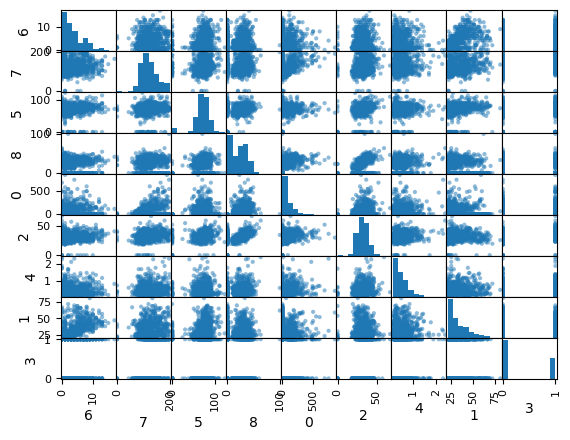

In [161]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder

display(diabetes_df.describe())
#display(diabetes.corr())

le = LabelEncoder()
labels = le.fit(diabetes_df.columns)

diabetes_df_copy = diabetes_df.copy()
diabetes_df_copy.columns = labels.transform(diabetes_df.columns)

_ = scatter_matrix(diabetes_df_copy)

In [162]:
fasce_eta = [20, 29, 30, 39, 40, 50]

for i in range(0, len(fasce_eta)-1, 2):
    filtro = diabetes_df['Age (years)'].between(fasce_eta[i], fasce_eta[i+1], inclusive='both')
    p_mean = diabetes_df[filtro]['Diastolic blood pressure (mm Hg)'].mean()
    print(f"Pressione diastolica media per la fascia {fasce_eta[i:i+2]}: ", p_mean)

Pressione diastolica media per la fascia [20, 29]:  65.34848484848484
Pressione diastolica media per la fascia [30, 39]:  69.66666666666667
Pressione diastolica media per la fascia [40, 50]:  74.21428571428571


# Esercizio 6
Il dataset insurance.csv contiene dati rispetto a caratteristiche e abitudini delle persone, e della zona in cui vivono, rispetto ai costi individuali per le cure mediche come premio per le assicurazioni sulla salute. 
- Visualizziamone le dimensioni, un'anteprima, e osserviamo i nomi di colonna;
- Quali sono le medie di charges rispetto a region? Ci sono differenze significative?
- E rispetto a smoker? E a sex?
- Quali sono i descrittori statistici di bmi? Quali sono minimo, media e massimo di charges rispetto ai diversi quartili dei valori di bmi?

In [163]:
insurance_df = pd.read_csv('insurance.csv')

print("Dimensione del dataset:", insurance_df.shape)
display(Markdown("### 5 righe a caso:"))
display(insurance_df.sample(5))

Dimensione del dataset: (1338, 7)


### 5 righe a caso:

,age,sex,bmi,children,smoker,region,charges
627,33,male,42.460,1,no,southeast,11326.71487
56,58,female,31.825,2,no,northeast,13607.36875
1108,26,male,30.000,1,no,southwest,2904.08800
772,44,female,36.480,0,no,northeast,12797.20962
168,19,female,31.825,1,no,northwest,2719.27975


In [164]:
for region in insurance_df['region'].unique():
    mean = insurance_df[ insurance_df['region'] == region]['charges'].mean()
    print(f"Media di charges per la regione '{region}': ", mean)

Media di charges per la regione 'southwest':  12346.937377292308
Media di charges per la regione 'southeast':  14735.411437609888
Media di charges per la regione 'northwest':  12417.57537396923
Media di charges per la regione 'northeast':  13406.384516385804


In [165]:
for smoker in insurance_df['smoker'].unique():
    mean = insurance_df[ insurance_df['smoker'] == smoker]['charges'].mean()
    print(f"Media di charges per i {"non " if smoker == 'no' else ""}fumatori: ", mean)

Media di charges per i fumatori:  32050.23183153284
Media di charges per i non fumatori:  8434.268297856204


In [191]:
for sex in insurance_df['sex'].unique():
    mean = insurance_df[ insurance_df['sex'] == sex]['charges'].mean()
    print(f"Media di charges per {"uomini" if sex == 'male' else "donne"}: ", mean)

Media di charges per donne:  12569.578843835347
Media di charges per uomini:  13956.751177721893


In [167]:
print("Statistica descrittiva di 'bmi':")
print(insurance_df['bmi'].describe())

Statistica descrittiva di 'bmi':
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


In [168]:
for i in range(1, 4):
    charges_quart = insurance_df[ insurance_df['bmi'] <= insurance_df['bmi'].quantile( i/4.0 ) ]['charges']
    print(f"Quartile {i/4.0}: \tmin={charges_quart.min()}\tmax={charges_quart.max()}\t  mean={charges_quart.mean()}")

Quartile 0.25: 	min=1121.8739	max=38245.59327	  mean=10360.662825492538
Quartile 0.5: 	min=1121.8739	max=62592.87309	  mean=10886.581103445766
Quartile 0.75: 	min=1121.8739	max=62592.87309	  mean=12028.77985970987


# Esercizio 7
Il dataset pokemon.csv contiene un database di Pokémon, con dati quali nome, tipi di attacco, valori di attacco/difesa/eccetera, e se sono o meno leggendari. 
- Verifichiamo la dimensione, un'anteprima e osserviamo i nomi di colonna;
- È verosimile che la prima colonna dovrebbe essere un indice?
- Confrontiamolo con l'indice messo automaticamente da Pandas: combaciano?
- Se no, settare la prima colonna come indice.

In [179]:
pokemon_df = pd.read_csv('pokemon.csv')

print("Dimensione del dataset:", pokemon_df.shape)
display(Markdown("### 5 righe a caso:"))
display(pokemon_df.sample(5))

Dimensione del dataset: (800, 13)


### 5 righe a caso:

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
739,671,Florges,Fairy,NaN,552,78,65,68,112,154,75,6,False
271,251,Celebi,Psychic,Grass,600,100,100,100,100,100,100,2,False
658,597,Ferroseed,Grass,Steel,305,44,50,91,24,86,10,5,False
570,511,Pansage,Grass,NaN,316,50,53,48,53,48,64,5,False
250,231,Phanpy,Ground,NaN,330,90,60,60,40,40,40,2,False


In [180]:
# la prima colonna potrebbe essere un'indice?
print("Differenza tra numero di righe e valori unici della prima colonna:")
print(pokemon_df.shape[0] - pokemon_df["#"].nunique(), "valori ripetuti")
display(pokemon_df.tail(4))

# le varianti di uno stesso pokemon hanno indice uguale
pokemon_df.index = pokemon_df["#"]
pokemon_df.pop("#")
display(pokemon_df.tail(4))

Differenza tra numero di righe e valori unici della prima colonna:
79 valori ripetuti


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


## Pokemon PCA for fun

### Label encoding delle colonne con stringhe

In [200]:
name_le = LabelEncoder()
name_enc = name_le.fit_transform(pokemon_df["Name"])

type1_le = LabelEncoder()
type1_enc = type1_le.fit_transform(pokemon_df["Type 1"])

type2_le = LabelEncoder()
type2_enc = type1_le.fit_transform(pokemon_df["Type 2"])

legendary_le = LabelEncoder()
legendary_enc = legendary_le.fit_transform(pokemon_df["Legendary"])

#print(name_enc)
#print(type1_enc)
#print(type2_enc)
#print(legendary_enc)

### PCA e plot

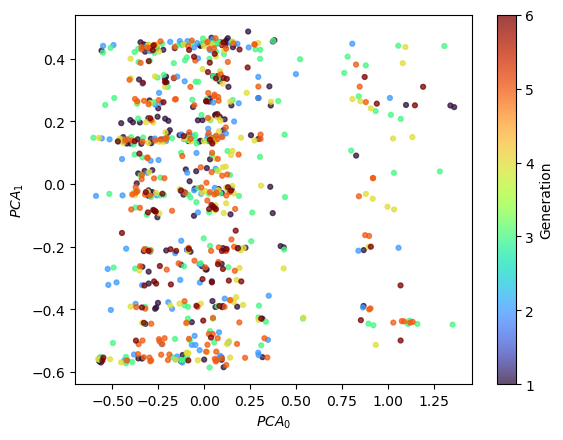

In [198]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# colona da usare come label
labels_col = "Generation"

# copia del df e sostituzione colonne stringate con quelle encoded
pokemon_df_copy = pokemon_df.copy()
#pokemon_df_copy["Name"] = name_enc
pokemon_df_copy.pop("Name")
pokemon_df_copy.pop("Type 2")
pokemon_df_copy["Type 1"] = type1_enc
#pokemon_df_copy["Type 2"] = type2_enc
pokemon_df_copy["Legendary"] = legendary_enc

# tolgo la colonna usata come label dal resto del df
pokemon_df_copy.pop(labels_col)

# normalizzo il df tra 0 e 1
pokemon_df_copy_norm = (pokemon_df_copy - pokemon_df_copy.min()) / (pokemon_df_copy.max() - pokemon_df_copy.min())

# 2 componenti
pca = PCA(2)
pokemon_pca = pca.fit_transform(pokemon_df_copy_norm)

sp = plt.scatter(pokemon_pca[:,0], pokemon_pca[:,1], c=pokemon_df[labels_col], cmap='turbo', alpha=0.75, s=12)
plt.colorbar(sp, label=labels_col)
plt.xlabel("${PCA}_0$")
plt.ylabel("${PCA}_1$")
plt.show()

In [196]:
import plotly.express as px

pca = PCA(3)
pokemon_pca = pca.fit_transform(pokemon_df_copy_norm)

fig = px.scatter_3d(x = pokemon_pca[:,0], y = pokemon_pca[:,1], z = pokemon_pca[:,2], 
                    color=pokemon_df[labels_col], 
                    color_continuous_scale='turbo')
fig.update_traces(marker=dict(size=4))
fig.update_layout(
    autosize=False,
    width=600,
    height=500,
    margin=dict(l=30, r=30, b=30, t=30, pad=4), 
    paper_bgcolor="white",
    scene = dict(xaxis_title='PCA0', yaxis_title='PCA1', zaxis_title='PCA2'))
fig.show()

# Esercizio 8
- Quali sono i Pokémon leggendari?
- E quali sono i leggendari di tipo 1 Grass?
- E leggendari di tipo 1 Ice o Fire?
- Trasformiamo la colonna Name nell'indice;
- Quali sono i Pokémon della prima generazione con attacco > 50 e HP < 60?

In [174]:
filtro_legendary = pokemon_df["Legendary"] == True

display(Markdown("# Pokemon Leggendari:"))
display(pokemon_df[ filtro_legendary ])

# Pokemon Leggendari:

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [175]:
filtro_type1_grass = pokemon_df["Type 1"] == "Grass"

display(Markdown("# Pokemon Leggendari di tipo 1 Grass:"))
display(pokemon_df[ filtro_legendary & filtro_type1_grass])

# Pokemon Leggendari di tipo 1 Grass:

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
492,ShayminLand Forme,Grass,NaN,600,100,100,100,100,100,100,4,True
492,ShayminSky Forme,Grass,Flying,600,100,103,75,120,75,127,4,True
640,Virizion,Grass,Fighting,580,91,90,72,90,129,108,5,True


In [176]:
filtro_type1_ice = pokemon_df["Type 1"] == "Ice"
filtro_type1_fire = pokemon_df["Type 1"] == "Fire"

display(Markdown("# Pokemon Leggendari di tipo 1 Ice o Fire:"))
display(pokemon_df[ filtro_legendary & (filtro_type1_ice | filtro_type1_fire) ])

# Pokemon Leggendari di tipo 1 Ice o Fire:

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
378,Regice,Ice,NaN,580,80,50,100,100,200,50,3,True
485,Heatran,Fire,Steel,600,91,90,106,130,106,77,4,True
721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [177]:
# per non perdere la colonna # la inserisco nel df
pokemon_df.insert(0, "#", pokemon_df.index)
# swap e pop della colonna Name
pokemon_df.index = pokemon_df["Name"]
pokemon_df.pop("Name")
pokemon_df

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,719,Rock,Fairy,600,50,100,150,100,150,50,6,True
DiancieMega Diancie,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [178]:
filtro_attack = pokemon_df["Attack"] > 50
filtro_hp = pokemon_df["HP"] < 60
filtro_gen = pokemon_df["Generation"] == 1

display(Markdown("# Pokemon prima generazione con attacco > 50 e HP < 60:"))
display(pokemon_df[ filtro_gen & filtro_attack & filtro_hp ])

# Pokemon prima generazione con attacco > 50 e HP < 60:

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False
Wartortle,8,Water,NaN,405,59,63,80,65,80,58,1,False
Rattata,19,Normal,NaN,253,30,56,35,25,35,72,1,False
Raticate,20,Normal,NaN,413,55,81,60,50,70,97,1,False
Spearow,21,Normal,Flying,262,40,60,30,31,31,70,1,False
Ekans,23,Poison,NaN,288,35,60,44,40,54,55,1,False
Pikachu,25,Electric,NaN,320,35,55,40,50,50,90,1,False
Sandshrew,27,Ground,NaN,300,50,75,85,20,30,40,1,False
